In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import stft

# Ruta del archivo .wav
archivo_wav = 'ejemplo5.wav'

# Leer el archivo .wav
frecuencia_muestreo, data = wavfile.read(archivo_wav)

# Mostrar información sobre el archivo
print(f'Frecuencia de muestreo: {frecuencia_muestreo} Hz')
print(f'Forma del arreglo de datos: {data.shape}')

t_final = len(data)/frecuencia_muestreo

tiempo = np.linspace(0,t_final,len(data))

Frecuencia de muestreo: 384000 Hz
Forma del arreglo de datos: (782270,)


In [96]:
#Comprobar si es estéreo o mono
data.shape

(119543, 2)

Canal izquierdo: (782270,)


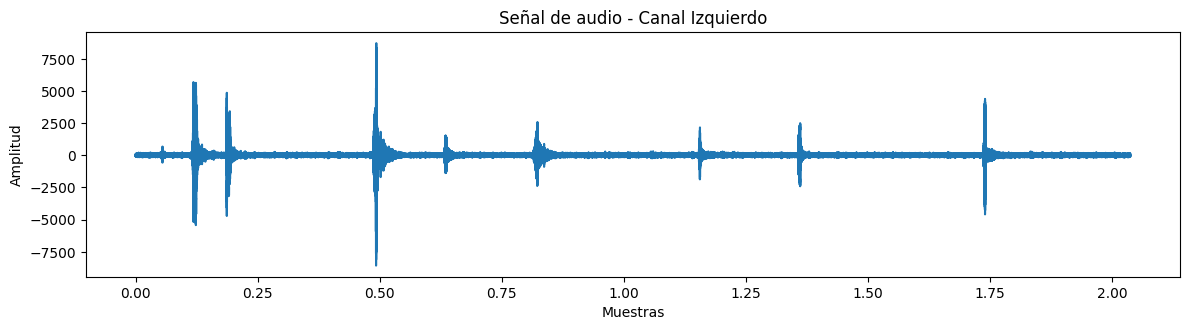

In [2]:
canal_izquierdo = data

    # Mostrar información sobre los canales separados
print(f'Canal izquierdo: {canal_izquierdo.shape}')


    # Visualización de los canales
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo, canal_izquierdo)
plt.title('Señal de audio - Canal Izquierdo')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

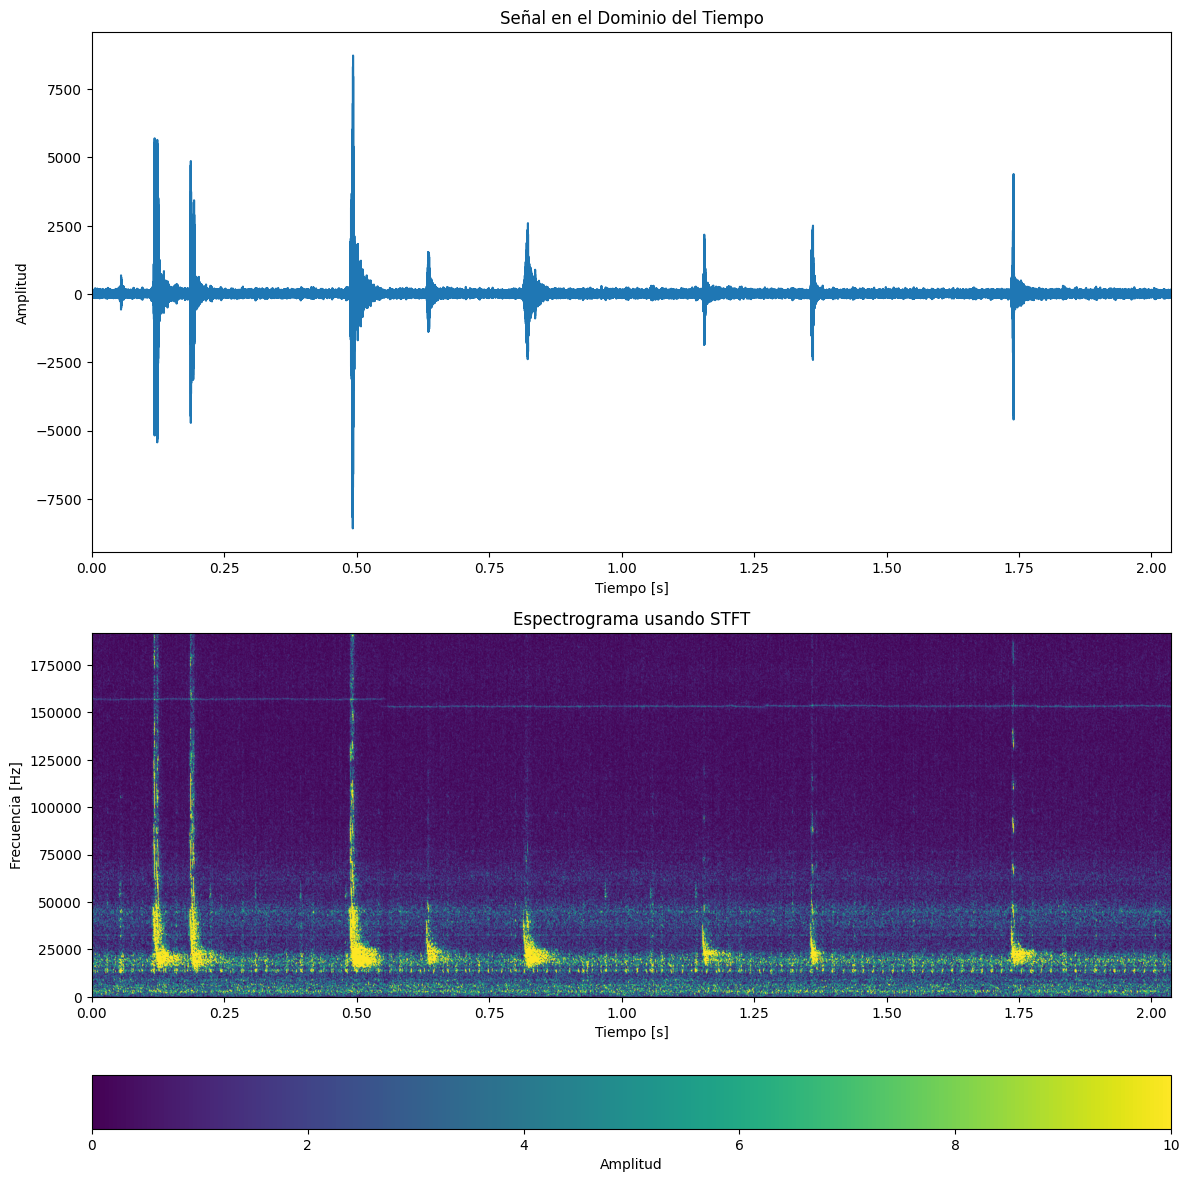

In [10]:
señal = canal_izquierdo
f_s = frecuencia_muestreo

f, t_stft, Zxx = stft(señal, f_s, nperseg=256*4)

# Visualización de la señal original
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)
plt.plot(tiempo, señal)
plt.xlabel('Tiempo [s]')
plt.xlim(0.0,t_final)
plt.ylabel('Amplitud')
plt.title('Señal en el Dominio del Tiempo')

# Visualización de la STFT
plt.subplot(2, 1, 2)
plt.pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud', vmin=0, vmax=10)
plt.colorbar(label='Amplitud', orientation="horizontal")
plt.xlabel('Tiempo [s]')
plt.ylabel('Frecuencia [Hz]')
plt.title('Espectrograma usando STFT')
plt.tight_layout()
plt.show()
